## 回歸分析

In [3]:
import pandas
df = pandas.read_csv('data/salary.csv',index_col=0)
#df = pandas.read_csv('https://github.com/ywchiu/tibamepy/blob/master/data/salary.csv')

df.head()

,year,salary
1,2.4,6600
2,5.5,10100
3,3.3,7300
4,0.2,5000
5,1.5,6100


In [13]:
%pylab inline
#df.plot(kind=)
df['salary'].values
type(df[['year']])
type(df['salary'].values)

Populating the interactive namespace from numpy and matplotlib


numpy.ndarray

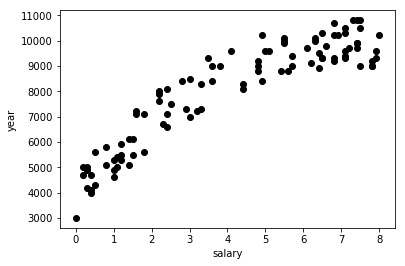

In [6]:
from matplotlib import pyplot as plt
X = df[['year']]
Y = df['salary'].values
plt.scatter(X,Y,color='black')
plt.ylabel('year')
plt.xlabel('salary')
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## 簡單線性回歸

Coefficients:  [ 712.59413615]
Intercept:  5049.00989981


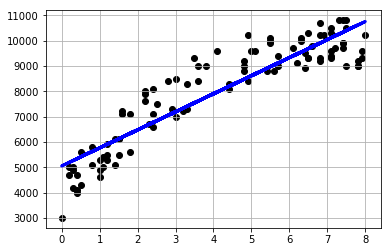

In [21]:
print('Coefficients: ',regr.coef_)
print('Intercept: ',regr.intercept_)

plt.scatter(X,Y,color='black')
plt.plot(X,regr.predict(X),color='blue',linewidth=3)
plt.grid()
plt.show()

In [23]:
salaries = pandas.DataFrame([{'year':6},{'year':8}])
print(regr.predict(salaries))


[  9324.57471669  10749.76298898]


In [24]:
## 存入模型
from sklearn.externals import joblib
joblib.dump(regr,'regression.pkl')


['regression.pkl']

In [26]:
## 引用模型
clf = joblib.load('regression.pkl')
print(clf.predict(salaries))

[  9324.57471669  10749.76298898]


## 多項式線性回歸

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree=2)
X_ = poly_reg.fit_transform(X)

regr = LinearRegression()
regr.fit(X_,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

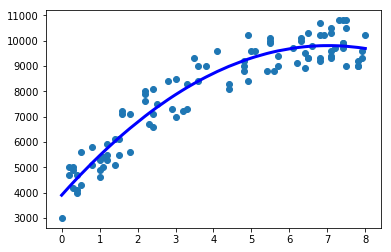

In [40]:
#plt.scatter(X_,Y)

X2 = X.sort_values(['year'])
X2_ = poly_reg.fit_transform(X2)
plt.scatter(X,Y)
plt.plot(X2,regr.predict(X2_),color='blue',linewidth=3)

In [44]:
Y

array([ 6600, 10100,  7300,  5000,  6100,  9900,  9000,  8800,  8400,
        9100, 10800,  8100,  6100,  9300,  8100,  9600,  8400,  9500,
       10500, 10100,  7000,  5400,  9700,  5000,  9300,  4700,  7600,
        6700,  9000,  7500,  4600,  4100,  9000,  7100,  4900,  9600,
        5900,  4900,  5300,  8900, 10000,  9300,  9000,  8800,  4200,
        5000,  3000,  9700,  9900,  5800,  9200,  4700,  9200,  8400,
       10800,  4300,  9400,  5600,  8500, 10200, 10700, 10800, 10000,
        4000,  9600, 10300,  9700,  8800,  5100,  9600,  7100,  9200,
        5100, 10500,  7900,  7200,  9800,  5500,  9900,  9300, 10200,
        9400, 10200, 10200,  9300,  9000,  5600,  9600,  7100,  5500,
        5300,  9000, 10300,  8000,  7200,  9300,  7300,  8300,  8300,  9000], dtype=int64)

## 多元線性回歸

In [91]:
import pandas

house = pandas.read_csv('data/house-prices.csv')
house.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [92]:
dummy_brick = pandas.get_dummies(house['Brick'])
dummy_neighbor = pandas.get_dummies(house['Neighborhood'])
#house['Brick']

In [94]:
house = pandas.concat([house,dummy_brick,dummy_neighbor],axis =1)
house.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood,No,Yes,East,North,West,No,Yes,East,North,West
0,1,114300,1790,2,2,2,No,East,1,0,1,0,0,1,0,1,0,0
1,2,114200,2030,4,2,3,No,East,1,0,1,0,0,1,0,1,0,0
2,3,114800,1740,3,2,1,No,East,1,0,1,0,0,1,0,1,0,0
3,4,94700,1980,3,2,3,No,East,1,0,1,0,0,1,0,1,0,0
4,5,119800,2130,3,3,3,No,East,1,0,1,0,0,1,0,1,0,0


In [98]:
# del house['No']
# del house['West']
# del house['Brick']
# del house['Neighborhood']
# del house['Home']
house['Price'].values

array([114300, 114200, 114800,  94700, 119800, 114600, 151600, 150700,
       119200, 104000, 132500, 123000, 102600, 126300, 176800, 145800,
       147100,  83600, 111400, 167200, 116200, 113800,  91700, 106100,
       156400, 149300, 137000,  99300,  69100, 188000, 182000, 112300,
       135000, 139600, 117800, 117100, 117500, 147000, 131300, 108200,
       106600, 133600, 105600, 154000, 166500, 103200, 129800,  90300,
       115900, 107500, 151100,  91100, 117400, 130800,  81300, 125700,
       140900, 152300, 138100, 155400, 180900, 100900, 161300, 120500,
       130300, 111100, 126200, 151900,  93600, 165600, 166700, 157600,
       107300, 125700, 144200, 106900, 129800, 176500, 121300, 143600,
       143400, 184300, 164800, 147700,  90500, 188300, 102700, 172500,
       127700,  97800, 143100, 116500, 142600, 157100, 160600, 152500,
       133300, 126800, 145500, 171000, 103200, 123100, 136800, 211200,
        82300, 146900, 108500, 134000, 117000, 108700, 111600, 114900,
      

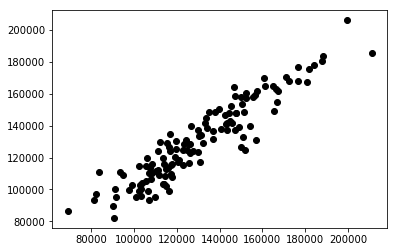

In [107]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

X = house[['SqFt','Bedrooms','Bathrooms','Offers','Yes','East','North']]
Y = house['Price'].values
regr.fit(X,Y)
regr.predict(X)

plt.scatter(Y,regr.predict(X),color='black')
# #plt.plot(X,regr.predict(X),color='red')
# plt.show()

## 回歸模型評估

In [108]:
import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(Y,X2)
est2 = est.fit()

print(est2.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     113.3
Date:                Sat, 02 Sep 2017   Prob (F-statistic):           8.25e-50
Time:                        13:40:32   Log-Likelihood:                -1356.7
No. Observations:                 128   AIC:                             2729.
Df Residuals:                     120   BIC:                             2752.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.284e+04   1.02e+04      2.231      0.0

## implement stepAIC

In [114]:
X2.columns
predictorcols = X.columns

In [115]:
import itertools
for rec in itertools.combinations(predictorcols,2):
    print (rec)

('SqFt', 'Bedrooms')
('SqFt', 'Bathrooms')
('SqFt', 'Offers')
('SqFt', 'Yes')
('SqFt', 'Yes')
('SqFt', 'East')
('SqFt', 'East')
('SqFt', 'North')
('SqFt', 'North')
('Bedrooms', 'Bathrooms')
('Bedrooms', 'Offers')
('Bedrooms', 'Yes')
('Bedrooms', 'Yes')
('Bedrooms', 'East')
('Bedrooms', 'East')
('Bedrooms', 'North')
('Bedrooms', 'North')
('Bathrooms', 'Offers')
('Bathrooms', 'Yes')
('Bathrooms', 'Yes')
('Bathrooms', 'East')
('Bathrooms', 'East')
('Bathrooms', 'North')
('Bathrooms', 'North')
('Offers', 'Yes')
('Offers', 'Yes')
('Offers', 'East')
('Offers', 'East')
('Offers', 'North')
('Offers', 'North')
('Yes', 'Yes')
('Yes', 'East')
('Yes', 'East')
('Yes', 'North')
('Yes', 'North')
('Yes', 'East')
('Yes', 'East')
('Yes', 'North')
('Yes', 'North')
('East', 'East')
('East', 'North')
('East', 'North')
('East', 'North')
('East', 'North')
('North', 'North')


In [121]:
AICs={}
for k in range(1,len(predictorcols)+1):
    for variables in itertools.combinations(predictorcols,k):
        #print(rec)
        predictors = X[list(variables)]
        predictors2 = sm.add_constant(predictors)
        est = sm.OLS(Y,predictors2)
        res = est.fit()
        AICs[variables] = res.aic

In [129]:
from collections import Counter
c = Counter(AICs)
c.most_common(5)[::-1]

[(('Offers', 'East', 'East'), 2962.7200641863878),
 (('Offers', 'East'), 2962.7200641863878),
 (('Offers',), 2963.862468153879),
 (('East', 'East'), 2974.473573747804),
 (('East',), 2974.473573747804)]

## 決策數

In [132]:
from sklearn import datasets
iris = datasets.load_iris()

In [133]:
iris['DESCR']

'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ============

In [134]:
iris.data[0:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [135]:
iris.target[0:5]

array([0, 0, 0, 0, 0])

In [136]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(iris.data,iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [137]:
predicted = clf.predict(iris.data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [138]:
from sklearn import tree
tree.export_graphviz(clf,out_file='tree.dot')

In [139]:
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

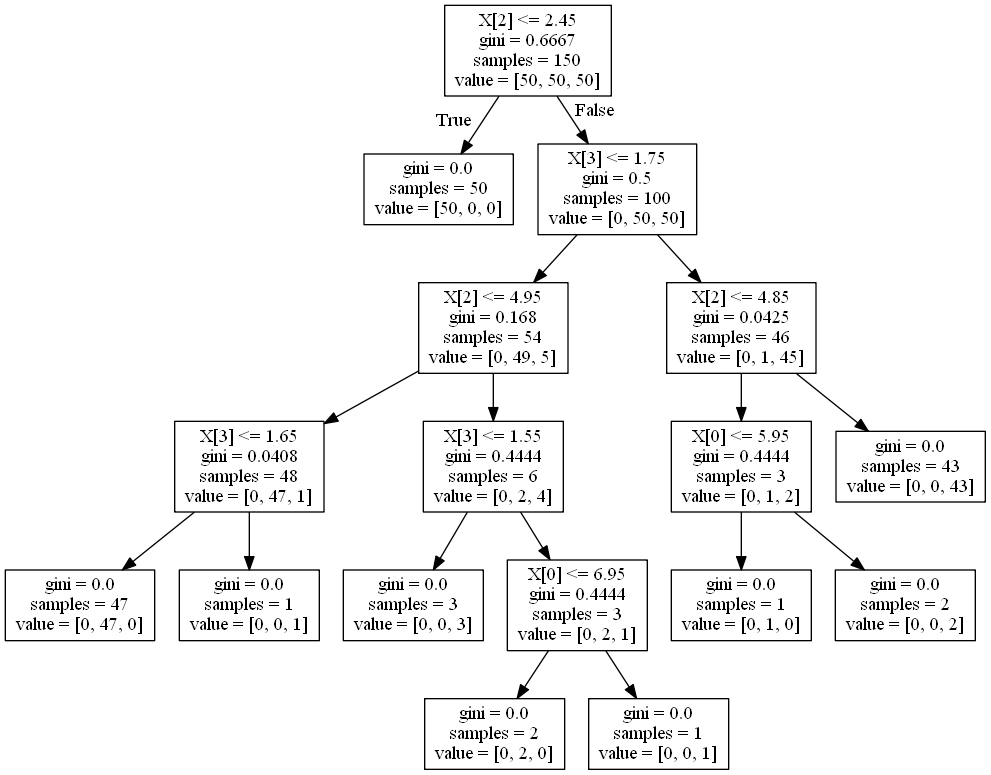

In [140]:
from PIL import Image
Image.open('tree.png')

In [141]:
iris.data[0:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [142]:
from sklearn import tree

clf2 = tree.DecisionTreeClassifier(max_depth=2)
clf2.fit(iris.data,iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

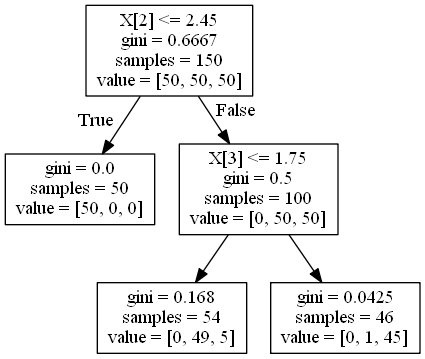

In [145]:
tree.export_graphviz(clf2,out_file='tree2.dot')
Image.open('tree2.png')

## 繪製決策邊界

In [146]:
from itertools import product

In [147]:
def plot_estimator(estimator, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.plot()
    plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y,  cmap = plt.cm.brg)
    plt.xlabel('Petal.Length')
    plt.ylabel('Petal.Width')
    plt.show()

## 建立SVM

In [148]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.svm import SVC

iris = load_iris()
X = iris.data[:,[2,3]]
y = iris.target

In [149]:
clf1 = SVC(kernel="rbf")
clf1.fit(X, y)

clf2 = SVC(kernel="poly")
clf2.fit(X, y)

clf3 = SVC(kernel="linear")
clf3.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

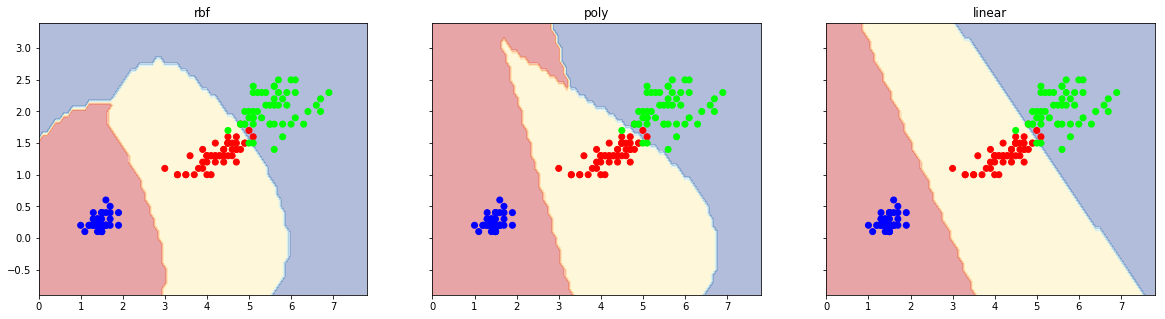

In [150]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(20, 5))

for idx, clf, title in zip([0,1,2],[clf1, clf2, clf3], ['rbf', 'poly', 'linear']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx].contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
    axarr[idx].scatter(X[:, 0], X[:, 1], c=y,  cmap = plt.cm.brg)
    axarr[idx].set_title(title)

## 隨機森林

In [151]:
from sklearn.ensemble import  RandomForestClassifier
iris = load_iris()

## 類神經網路

In [153]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
digits = load_digits()